# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Question 1

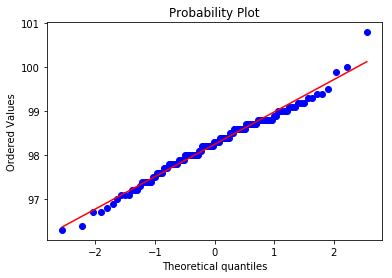

In [4]:
stats.probplot(df.temperature, plot=plt)  # Quantile plot
plt.show()

Offhand, this looks normally distributed, but there is one suspicious outlying point.

In [5]:
zmax = (df.temperature.max()-df.temperature.mean())/df.temperature.std()
zmax, stats.norm.sf(zmax), len(df), stats.norm.sf(zmax)*len(df)

(3.479034130559948, 0.00025161224556676166, 130, 0.03270959192367902)

We can reject normality at the .05 level based on that one point, but personally, I don't find that very convincing.  Considering that a normally distributed sample isn't a necessary condition for the CLT, that small deviation from normality doesn't bother me.  But let's try some formal tests.

In [6]:
stats.shapiro(df.temperature)

(0.9865770936012268, 0.233174666762352)

In [7]:
stats.anderson(df.temperature)

AndersonResult(statistic=0.5201038826714353, critical_values=array([0.56 , 0.637, 0.765, 0.892, 1.061]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Neither the Shapiro-Wilk test nor the Anderson-Darling test rejects normality. So that's nice.

## Question 2

The rule of thumb is that the sample size needs to be at least 30. So 130 would be a fairly large sample. (If we use smaller submsamples for some tests, it's conceivable that sample size could possibly become a problem.) I'll note, though, that the sample is not huge, so the power of the statistical tests may not be as high as we would like against certain alternative hypotheses.

Are the observations independent? I'm guessing the answer is yes, since there's no obvious reason to expect body temperatures to be correlated among individuals. But without knowing more about how the sample was collected and what might affect human body temperature, it's hard to be sure. Maybe we can proceed on the assumption that they are independent but recognize that the results could be overturned by later evidence.

## Question 3

In [8]:
theoretical_mean = 98.6
empirical_mean = df.temperature.mean()
empirical_mean

98.24923076923078

In [9]:
# Bootstrap test
np.random.seed(1)
nreps = 10000
means = np.empty(nreps)
for i in range(nreps):
    means[i] = np.mean(np.random.choice(df.temperature, size=len(df)))
len(means[means>theoretical_mean])/nreps

0.0

The bootstrap test implies a rejection at at least the 0.0001 level.

We can't do a two-sample test because we don't have Wunderlich's sample. All we can do is a one-sample test of whether our sample could be from a distribution with mean equal to 98.6. I believe it should be a two-sided test, because we had no *a priori* expectation about the direction in which Wunderlich's value would be off.

The t-distribution with 129 degrees of freedom is almost identical to the normal distribution, so we can use a z-test.

In [10]:
z = (empirical_mean - theoretical_mean) / (df.temperature.std() / np.sqrt(len(df)))
p = 2*stats.norm.sf(-z)
z, p

(-5.454823292364079, 4.90215701411338e-08)

In [11]:
stats.ttest_1samp(df.temperature, theoretical_mean)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

We are far into the tails of the distribution, so the t-distribution and normal distribution turn out to be different.  At least, the p-value associated with the z-test is smaller. The z-test assumes that the variance is known, which it's not; the t-test allows for the distribution of the variance (as eastimated from the sample) around the true population variance, so in general, the t-test is less likely to reject the null.  With 129 degrees of freedom, it only makes a difference in the extreme tails.  The difference isn't substantively important for hypothesis tests, since it will only come into play when the t-test is already rejecting at any reasonable level of significance.

## Question 4

In [12]:
size = 10
np.random.seed(0)
sample = np.random.choice(df.temperature, size=size, replace=False)
z = (np.mean(sample) - theoretical_mean) / (np.std(sample) / np.sqrt(size))
p = 2*stats.norm.sf(-z)
z, p

(-1.712900399257807, 0.08673086482755465)

In [13]:
stats.ttest_1samp(sample, theoretical_mean)

Ttest_1sampResult(statistic=-1.624999999999938, pvalue=0.13860835307134423)

Here there's a difference. The difference in values just has to do with whether we divide by N or N-1 to calculate the variance.  However...

In [14]:
z = (np.mean(sample) - theoretical_mean) / (np.std(sample) / np.sqrt(size-1))
p = 2*stats.norm.sf(-z)
z, p

(-1.624999999999938, 0.10416255883045229)

...either way, the p-values are noticeably different.  The z-test appears to reject the null at the 0.10 level, whereas the t-test does not.  For this small sample, the t-test is the correct one to use, because the sample is too small to give us a precise variance estimate.  Thus our test must take into account distribution of the estimated variance around its true value.

## Question 5

In [15]:
# Bootstrap confidence interval
np.random.seed(2)
nreps = 10000
cases = np.empty(nreps)
for i in range(nreps):
    cases[i] = np.random.choice(df.temperature, size=1)
np.percentile(cases, [2.5, 97.5])

array([96.7, 99.5])

In [16]:
margin = 1.96*df.temperature.std()
margin

1.437038989756333

In [17]:
df.temperature.mean()-margin, df.temperature.mean()+margin

(96.81219177947445, 99.68626975898711)

So, based on a 95% confidence interval, temperatures below about 96.8 and above about 99.7 should be considered abnormal.  But if you have 20 people, you should, by construction, expect one of them to have a temperature outside this "normal" range.  And this is also subject to the caveat that the data distribution may not be normal (in which case the confidence interval wouldn't be valid), since with only one inidividual, we don't have the CLT to rely on.  The fancy tests couldn't reject normality, but the back-of-the-envelope test suggested that the distribution might not be normal.

## Question 6

In [18]:
males = df[df.gender=='M'].temperature
females = df[df.gender=='F'].temperature
stats.ttest_ind(males, females)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

In [19]:
stats.ttest_ind(males, females, equal_var=False)

Ttest_indResult(statistic=-2.285434538165611, pvalue=0.023938264182934196)

I tried the t-test both with and without assuming equal variance, and in both cases, the hypothesis of equal means is rejcted at the 0.05 level of significance.

In [20]:
males.mean(), females.mean(), males.mean() - females.mean()

(98.1046153846154, 98.39384615384613, -0.289230769230727)

On average, the difference is around 0.3 degrees.

In [21]:
males.count(), females.count()

(65, 65)

Both the male and female subsamples are large enough that the usual statistical assumptions should apply, even if the distributions of individual data differ slightly from a normal distribution.  I conclude that males typically have lower body temperatures than females. 

Among other things, this means that the observations in the overall sample are not independent.  So technically, the statistics presented earlier are not valid.  However...

In [22]:
stats.ttest_1samp(males, theoretical_mean), stats.ttest_1samp(females, theoretical_mean)

(Ttest_1sampResult(statistic=-5.715757449318691, pvalue=3.083840317313081e-07),
 Ttest_1sampResult(statistic=-2.2354980796784965, pvalue=0.028880450789682037))

For both males and females, we can reject (at the 0.05 level) the original hypothesis that average body temperature is 98.6, so, provided we can assume independence within gender, the original rejection still holds.

I'm starting to get suspicious, though, especially about females. Since we've already confirmed one source on non-independence, doesn't it seem likely that there might be others?  The results for males are strong enough that they seem likely to hold up under more stringent testing.  For females, though, the result is already borderline.  (We can't reject at the 0.01 level.)

The story I would like to tell is this: Wunderlich's conclusion appears to be approximately (prehaps not exactly) correct for females.  It appears to be wrong for males, with typical male body temperature being closer to 98.1 rather than 98.6.